In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
Crude_vs_Indigo = pd.read_csv(r'F:\Data Science and machine learning\regression files\Crude_Indigo_1.csv')

In [71]:
Crude_vs_Indigo

,Crude,Indigo
0,74.96,724.45
1,73.17,744.45
2,70.97,760.80
3,71.78,808.55
4,72.11,822.30
5,69.75,869.25
6,69.12,837.15
7,69.12,831.65
8,69.17,806.50
9,66.43,803.85


Text(0.5, 1.0, 'Crude VS Indigo')

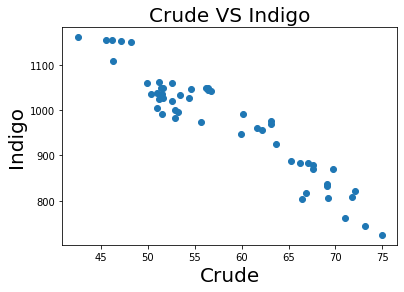

In [72]:
plt.scatter(Crude_vs_Indigo['Crude'],Crude_vs_Indigo['Indigo'])
plt.xlabel('Crude',fontsize=20)
plt.ylabel('Indigo',fontsize=20)
plt.title('Crude VS Indigo',fontsize=20)

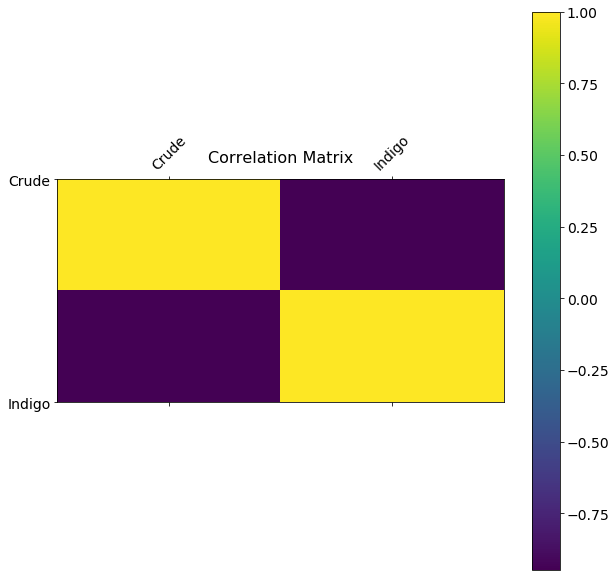

In [73]:
f = plt.figure(figsize=(10, 10))
plt.matshow(Crude_vs_Indigo.corr(), fignum=f.number)
plt.xticks(range(Crude_vs_Indigo.shape[1]), Crude_vs_Indigo.columns, fontsize=14, rotation=45)
plt.yticks(range(Crude_vs_Indigo.shape[1]), Crude_vs_Indigo.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

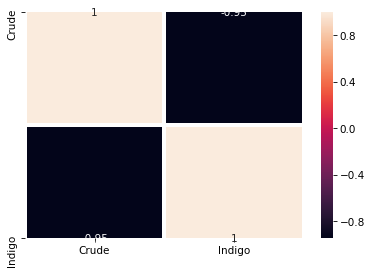

In [74]:
plt.figure(dpi=75)
sns.heatmap(Crude_vs_Indigo.corr(),linecolor='white',linewidths=3,annot=True)

## Building the linear regression model

In [75]:
# Separate Iv and Dv

x = Crude_vs_Indigo['Crude'].values.reshape(-1,1)
y = Crude_vs_Indigo['Indigo']

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [77]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
reg.intercept_

1695.8076051212292

In [79]:
reg.coef_

array([-12.41627738])

# printing the equation

In [80]:
print("The linear regression model is : Y = {:.5} + {:.5}X".format(reg.intercept_,reg.coef_[0]))

The linear regression model is : Y = 1695.8 + -12.416X


## Plotting the best fit line

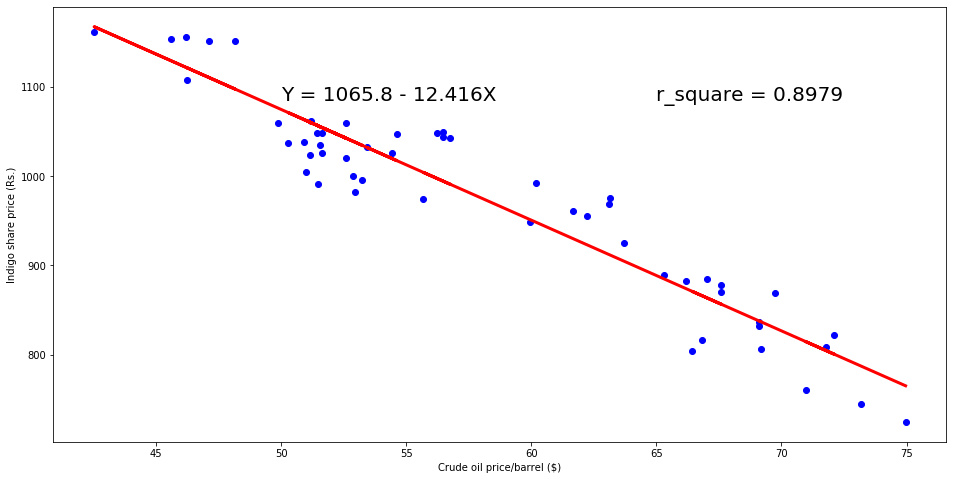

In [81]:
predictions = reg.predict(x)

plt.figure(figsize=(16,8))
plt.scatter(Crude_vs_Indigo['Crude'],Crude_vs_Indigo['Indigo'],c='Blue')

plt.plot(Crude_vs_Indigo['Crude'],predictions,c='Red',linewidth=3)

plt.xlabel('Crude oil price/barrel ($)')
plt.ylabel('Indigo share price (Rs.)')
plt.annotate('Y = 1065.8 - 12.416X',(50,1085),size=20)
plt.annotate('r_square = 0.8979',(65,1085),size=20)
plt.show()

In [14]:
predictions

array([ 765.08345248,  787.308589  ,  814.62439924,  804.56721456,
        800.46984303,  829.77225765,  837.5945124 ,  837.5945124 ,
        836.97369853,  870.99429856,  866.15195038,  856.5914168 ,
        856.5914168 ,  863.42036936,  874.09836791,  884.90052923,
        905.01489859,  911.84385115,  912.34050225,  923.39098912,
        930.09577891,  948.47186943,  951.70010155, 1004.34511766,
        997.39200232,  994.78458407,  994.78458407,  991.05970086,
       1032.40590454, 1017.50637168, 1019.86546439, 1054.75520383,
       1055.62434325, 1071.39301552, 1056.99013376, 1063.446598  ,
       1038.36571769, 1034.64083447, 1039.11069433, 1056.49348267,
       1042.587252  , 1062.57745858, 1054.50687828, 1060.71501698,
       1042.95974032, 1060.09420311, 1076.48368925, 1121.67893893,
       1097.71552358, 1110.75261483, 1129.74951923, 1167.74332802,
       1121.92726447])

In [15]:
print('R-Squared:', r2_score(y,predictions))

R-Squared: 0.8979800024743951


In [16]:
reg.predict(np.array([[76]]))

array([752.17052401])

## Using Statsmodel

In [19]:
import statsmodels.api as sm

In [21]:
x = Crude_vs_Indigo['Crude']
y = Crude_vs_Indigo['Indigo']

In [22]:
x = sm.add_constant(x)

C:\Users\WIN-7\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
x.head()

,const,Crude
0,1.0,74.96
1,1.0,73.17
2,1.0,70.97
3,1.0,71.78
4,1.0,72.11


In [25]:
model2 = sm.OLS(y,x) #(output,input)

fitted = model2.fit()

In [26]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 Indigo   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     448.9
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           6.17e-27
Time:                        09:26:41   Log-Likelihood:                -264.60
No. Observations:                  53   AIC:                             533.2
Df Residuals:                      51   BIC:                             537.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1695.8076     34.502     49.151      0.0

In [27]:
Crude_vs_Indigo_Copy = Crude_vs_Indigo.copy()

In [36]:
new_column=fitted.fittedvalues

In [38]:
new_column

0      765.083452
1      787.308589
2      814.624399
3      804.567215
4      800.469843
5      829.772258
6      837.594512
7      837.594512
8      836.973699
9      870.994299
10     866.151950
11     856.591417
12     856.591417
13     863.420369
14     874.098368
15     884.900529
16     905.014899
17     911.843851
18     912.340502
19     923.390989
20     930.095779
21     948.471869
22     951.700102
23    1004.345118
24     997.392002
25     994.784584
26     994.784584
27     991.059701
28    1032.405905
29    1017.506372
30    1019.865464
31    1054.755204
32    1055.624343
33    1071.393016
34    1056.990134
35    1063.446598
36    1038.365718
37    1034.640834
38    1039.110694
39    1056.493483
40    1042.587252
41    1062.577459
42    1054.506878
43    1060.715017
44    1042.959740
45    1060.094203
46    1076.483689
47    1121.678939
48    1097.715524
49    1110.752615
50    1129.749519
51    1167.743328
52    1121.927264
dtype: float64

In [39]:
Crude_vs_Indigo_Copy['predicted_values']=new_column 

In [40]:
Crude_vs_Indigo_Copy

,Crude,Indigo,predicted_values
0,74.96,724.45,765.083452
1,73.17,744.45,787.308589
2,70.97,760.80,814.624399
3,71.78,808.55,804.567215
4,72.11,822.30,800.469843
5,69.75,869.25,829.772258
6,69.12,837.15,837.594512
7,69.12,831.65,837.594512
8,69.17,806.50,836.973699
9,66.43,803.85,870.994299


In [41]:
new_column_2 = fitted.resid

In [42]:
new_column_2

0    -40.633452
1    -42.858589
2    -53.824399
3      3.982785
4     21.830157
5     39.477742
6     -0.444512
7     -5.944512
8    -30.473699
9    -67.144299
10   -49.401950
11    21.358583
12    13.508583
13    20.979631
14     8.301632
15     3.999471
16    20.385101
17    63.406149
18    56.559498
19    32.259011
20    31.104221
21    43.478131
22    -3.100102
23   -29.445118
24    51.057998
25    49.165416
26    54.615416
27    51.590299
28     0.744095
29    29.443628
30     6.534536
31    -6.105204
32   -20.024343
33   -34.493016
34    -8.540134
35   -25.196598
36   -55.565718
37   -38.840834
38   -38.310694
39   -65.393483
40   -21.537252
41   -58.027459
42   -28.406878
43   -36.765017
44    17.040260
45     1.505797
46   -16.383689
47   -13.178939
48    53.734476
49    41.297385
50    24.700481
51    -6.343328
52    34.322736
dtype: float64

In [43]:
Crude_vs_Indigo_Copy['Residuals']=new_column_2

In [44]:
Crude_vs_Indigo_Copy

,Crude,Indigo,predicted_values,Residuals
0,74.96,724.45,765.083452,-40.633452
1,73.17,744.45,787.308589,-42.858589
2,70.97,760.80,814.624399,-53.824399
3,71.78,808.55,804.567215,3.982785
4,72.11,822.30,800.469843,21.830157
5,69.75,869.25,829.772258,39.477742
6,69.12,837.15,837.594512,-0.444512
7,69.12,831.65,837.594512,-5.944512
8,69.17,806.50,836.973699,-30.473699
9,66.43,803.85,870.994299,-67.144299


In [45]:
Crude_vs_Indigo_Copy['cal_error']=Crude_vs_Indigo_Copy['Indigo']-Crude_vs_Indigo_Copy['predicted_values']

In [47]:
Crude_vs_Indigo_Copy.head()

,Crude,Indigo,predicted_values,Residuals,cal_error
0,74.96,724.45,765.083452,-40.633452,-40.633452
1,73.17,744.45,787.308589,-42.858589,-42.858589
2,70.97,760.80,814.624399,-53.824399,-53.824399
3,71.78,808.55,804.567215,3.982785,3.982785
4,72.11,822.30,800.469843,21.830157,21.830157


In [48]:
SE = (Crude_vs_Indigo_Copy['Indigo']-Crude_vs_Indigo_Copy['predicted_values'])**20

In [51]:
SSE = sum(SE)

In [52]:
SSE

67323.09978270078

In [58]:
Mean =Crude_vs_Indigo_Copy.Indigo.mean()

In [59]:
SR = (Crude_vs_Indigo_Copy['predicted_values']-Mean)**2

In [60]:
SSR = sum(SR)

In [61]:
SSR

592577.9138965431

In [62]:
SST = SSR+SSE

In [63]:
SST

659901.0136792439

In [64]:
sum((Crude_vs_Indigo_Copy['Indigo']-Mean)**2)

659901.0136792454

In [65]:
R_SQUARE = SSR/SST

In [66]:
R_SQUARE

0.8979800024743949

In [85]:
pip install lmdiag

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib==3.1.0

  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
Note: you may need to restart the kernel to use updated packages.
